In [1]:
import tensorflow as ts 

2025-05-03 03:35:32.607890: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
obs  = 1000
xx =  np.random.uniform(low =-1,high = 1,size=(obs,1))
zz  =  np.random.uniform(low =-1,high = 1,size=(obs,1))
imputs  = np.column_stack((xx,zz))

noise   =  np.random.uniform(low =-1,high = 1,size=(obs,1))

y =  3*xx-6*xx+8+noise
npz = np.savez('my_tf_file',inputs = imputs,targets= y)

In [4]:
df = np.load('my_tf_file.npz')

In [5]:
df

NpzFile 'my_tf_file.npz' with keys: inputs, targets

In [6]:
in_size = 2
outputs = 1

model = ts.keras.Sequential([
    ts.keras.layers.Dense(outputs,
                          kernel_initializer = ts.random_uniform_initializer(minval=-0.1,maxval=0.1),
                          bias_initializer = ts.random_uniform_initializer(minval=-0.1,maxval=0.1))
])

optimize = ts.keras.optimizers.SGD(learning_rate = 0.02)
model.compile(optimizer = optimize,loss = 'mean_squared_error')
model.fit(df['inputs'],df['targets'],epochs=200,verbose=2)

Epoch 1/200
32/32 - 0s - 13ms/step - loss: 26.5914
Epoch 2/200
32/32 - 0s - 2ms/step - loss: 2.8310
Epoch 3/200
32/32 - 0s - 2ms/step - loss: 0.7444
Epoch 4/200
32/32 - 0s - 2ms/step - loss: 0.4588
Epoch 5/200
32/32 - 0s - 2ms/step - loss: 0.3813
Epoch 6/200
32/32 - 0s - 2ms/step - loss: 0.3525
Epoch 7/200
32/32 - 0s - 2ms/step - loss: 0.3405
Epoch 8/200
32/32 - 0s - 2ms/step - loss: 0.3352
Epoch 9/200
32/32 - 0s - 2ms/step - loss: 0.3332
Epoch 10/200
32/32 - 0s - 2ms/step - loss: 0.3323
Epoch 11/200
32/32 - 0s - 2ms/step - loss: 0.3323
Epoch 12/200
32/32 - 0s - 2ms/step - loss: 0.3322
Epoch 13/200
32/32 - 0s - 2ms/step - loss: 0.3321
Epoch 14/200
32/32 - 0s - 2ms/step - loss: 0.3321
Epoch 15/200
32/32 - 0s - 2ms/step - loss: 0.3320
Epoch 16/200
32/32 - 0s - 2ms/step - loss: 0.3321
Epoch 17/200
32/32 - 0s - 2ms/step - loss: 0.3320
Epoch 18/200
32/32 - 0s - 2ms/step - loss: 0.3321
Epoch 19/200
32/32 - 0s - 2ms/step - loss: 0.3320
Epoch 20/200
32/32 - 0s - 2ms/step - loss: 0.3319
Epoch 2

In [7]:
print(model.layers[0].get_weights()[0])

[[-2.9923666 ]
 [ 0.03702384]]


In [8]:
model.layers[0].get_weights()[1]

array([7.9660077], dtype=float32)

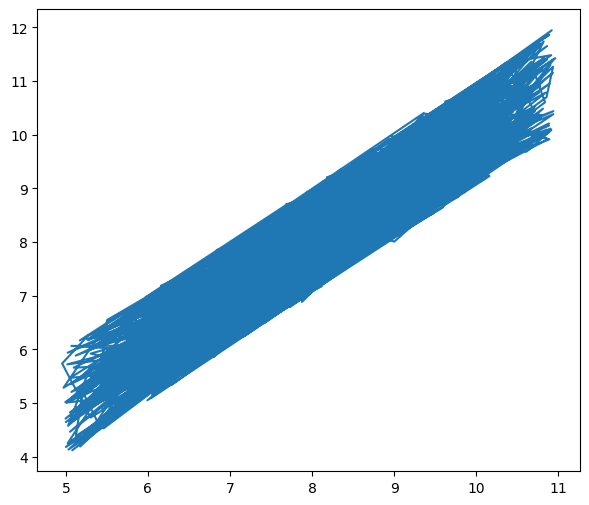

In [9]:
fig ,ax =  plt.subplots(figsize = (7,6))
ax.plot(np.squeeze(model.predict_on_batch(df['inputs'])),np.squeeze(df['targets']))


## numpy neuro network

In [11]:
xx =  np.random.uniform(low =-1,high = 20,size=(obs,1))
zz  =  np.random.uniform(low =-1,high = 20,size=(obs,1))
imputs  = np.column_stack((xx,zz))

noise   =  np.random.uniform(low =-1,high = 20,size=(obs,1))

y =  3*xx+55*xx+noise




init  = 0.2
weight =  np.random.uniform(-init,init,size=(2,1))
bias =  np.random.uniform(-init,init,size=(1))




rate  = 0.01
for i in range(30):
    out = np.dot(imputs,weight)+bias
    delta =  out - y
    loss = np.sum(delta**2)/2/obs
    del_scale = delta/obs
    print(loss)
    weight = weight - rate*np.dot(imputs.T,del_scale)

214835.90946872326
243101.98507010442
294664.5578738333
365839.9814907344
457797.9057489828
574321.5113304255
721086.4116101387
905590.1535642336
1137397.1089878844
1428579.1820765433
1794322.4942541528
2253710.6137347687
2830716.7840985097
3555453.57298135
4465743.816251968
5609094.307424232
7045175.022741214
8848933.184153475
11114504.645110546
13960126.715837907
17534308.81681135
22023582.99686981
27662238.804851055
34744550.56505933
43640135.18248854
54813241.98220299
68846981.29520361
86473756.25006713
108613485.96711752
136421614.9753559
